# Initial Dataset Overview 
EDA for correlations over deployments001-007 of site01

In [2]:
%load_ext autoreload
%autoreload 2
    
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from pathlib import Path
from config import *

df = pd.read_csv(Path(ANNOTATIONS) / 'archive' / 'correlated_annotations_7depl.csv', 
                 parse_dates=["datetime"])
categorical = ['label', 'deployment', 'site']
df[categorical] = df[categorical].astype('category')
df.head()

,peak_time,xcorrcoef,min_t,max_t,min_f,max_f,recording,deployment,site,label,datetime,recording_length
0,364.624000,0.584717,364.160667,365.087333,5531.0,10125.0,1_20230317_070000.wav,1,1,fast_trill_6khz,2023-03-17 07:00:00,600.0
1,215.178667,0.658409,214.715333,215.642000,5531.0,10125.0,1_20230319_063000.wav,1,1,fast_trill_6khz,2023-03-19 06:30:00,600.0
2,526.810667,0.604653,526.347333,527.274000,5531.0,10125.0,1_20230320_063000.wav,1,1,fast_trill_6khz,2023-03-20 06:30:00,600.0
3,544.922667,0.663969,544.459333,545.386000,5531.0,10125.0,1_20230320_063000.wav,1,1,fast_trill_6khz,2023-03-20 06:30:00,600.0
4,449.312000,0.610269,448.848667,449.775333,5531.0,10125.0,1_20230320_073000.wav,1,1,fast_trill_6khz,2023-03-20 07:30:00,600.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   peak_time         2190 non-null   float64       
 1   xcorrcoef         2190 non-null   float64       
 2   min_t             2190 non-null   float64       
 3   max_t             2190 non-null   float64       
 4   min_f             2190 non-null   float64       
 5   max_f             2190 non-null   float64       
 6   recording         2190 non-null   object        
 7   deployment        2190 non-null   category      
 8   site              2190 non-null   category      
 9   label             2190 non-null   category      
 10  datetime          2190 non-null   datetime64[ns]
 11  recording_length  2190 non-null   float64       
dtypes: category(3), datetime64[ns](1), float64(7), object(1)
memory usage: 161.2+ KB


<Axes: title={'center': 'annotations per deployment'}, ylabel='count'>

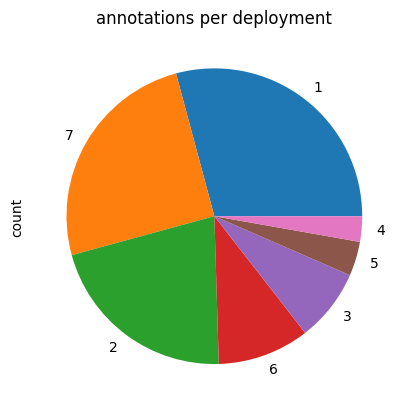

In [8]:
df["deployment"].value_counts().plot(kind='pie', title="annotations per deployment")

In [9]:
df["datetime"].min(), df["datetime"].max()

(Timestamp('2023-03-16 06:30:00'), Timestamp('2023-09-18 06:00:00'))

In [10]:
 df["datetime"].max() - df["datetime"].min() 

Timedelta('185 days 23:30:00')

label
fast_trill_6khz     Axes(0.125,0.11;0.775x0.77)
nr_syllable_3khz    Axes(0.125,0.11;0.775x0.77)
triangle_3khz       Axes(0.125,0.11;0.775x0.77)
upsweep_500hz       Axes(0.125,0.11;0.775x0.77)
Name: datetime, dtype: object

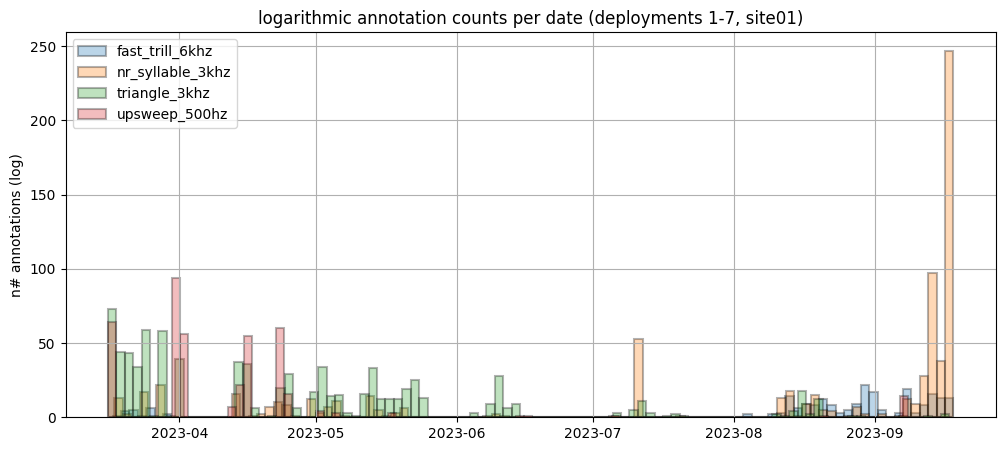

In [13]:
import matplotlib.pyplot as plt

plt.yscale("linear")
title = "logarithmic annotation counts per date (deployments 1-7, site01)"
plt.title(title)
plt.ylabel("n# annotations (log)")

df.groupby('label')["datetime"].hist(bins=100, legend=True, alpha=0.3, figsize=(12, 5),
                                edgecolor='black', linewidth=1.5)

# plt.savefig(f"../figures/{title}.png")

label
fast_trill_6khz     Axes(0.125,0.11;0.775x0.77)
nr_syllable_3khz    Axes(0.125,0.11;0.775x0.77)
triangle_3khz       Axes(0.125,0.11;0.775x0.77)
upsweep_500hz       Axes(0.125,0.11;0.775x0.77)
Name: datetime, dtype: object

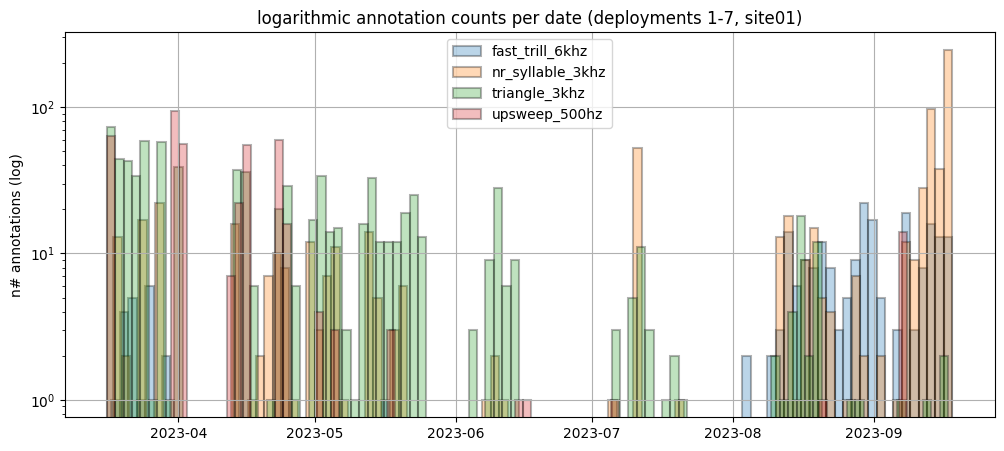

In [14]:
plt.yscale("logarithmic")
title = "logarithmic annotation counts per date (deployments 1-7, site01)"
plt.title(title)
plt.ylabel("n# annotations (log)")

df.groupby('label')["datetime"].hist(bins=100, legend=True, alpha=0.3, figsize=(12, 5),
                                edgecolor='black', linewidth=1.5)

# plt.savefig(f"../figures/{title}.png")
# TODO line

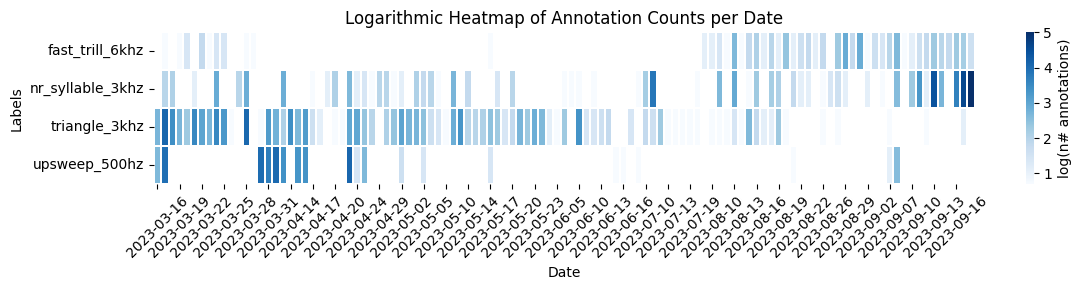

In [34]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


df['datetime'] = pd.to_datetime(df['datetime'])

annotation_counts = df.groupby([df['datetime'].dt.date, 'label']).size().unstack(fill_value=0)

heatmap_data = annotation_counts.transpose()

heatmap_data = heatmap_data.replace(0, np.nan)

plt.figure(figsize=(12, 3))
sns.heatmap(np.log1p(heatmap_data), cmap='Blues', cbar_kws={'label': 'log(n# annotations)'}, linewidths=0.1)

plt.title("Logarithmic Heatmap of Annotation Counts per Date")
plt.xlabel("Date")
plt.ylabel("Labels")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig(FIGURES_DIR / 'heatmap.png')
plt.show()


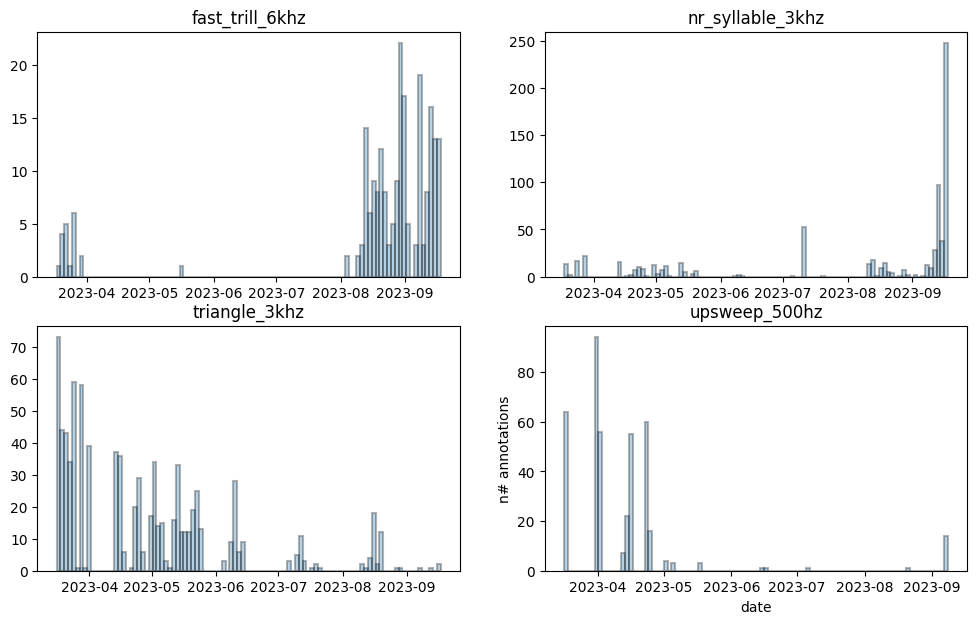

In [119]:
fig, axes = plt.subplots(2, 2,  figsize=(12, 7))

title = "grid annotation counts per date (deployments 1-7, site01)"

for i, (label, group) in enumerate(df.groupby('label')):
    ax = axes[i // 2][i % 2]
    ax.set_title(label)
    ax.hist(group['datetime'], bins=100, alpha=0.3, edgecolor='black', linewidth=1.5)
    
plt.xlabel("date")
plt.ylabel("n# annotations")
plt.savefig(f"../figures/{title}.png")
plt.show()

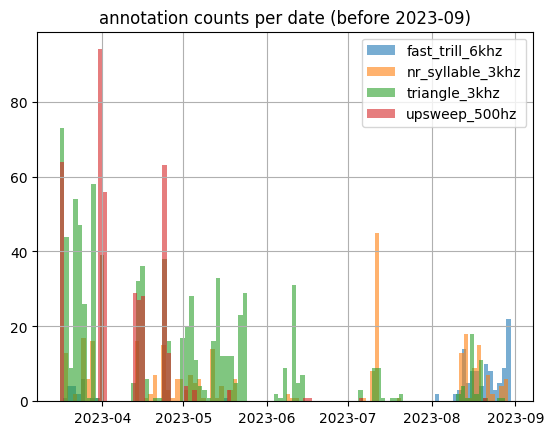

In [82]:
from datetime import date

cut = df[df["datetime"] <= pd.to_datetime('2023-09-01')]
plt.title("annotation counts per date (before 2023-09)")
plt.ylabel("n# annotations")
ax = cut.groupby('label').datetime.hist(bins=100, 
                                             legend=True, 
                                             alpha = 0.6, lw=3)
